# Operaciones básicas sobre texto usando NLTK

* *30 min* | Última modificación: Noviembre 29, 2020

In [1]:
import nltk

nltk.download("stopwords")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
##
## Preparacion de los datos
##
import pandas as pd

data = pd.read_csv(
    "https://raw.githubusercontent.com/jdvelasq/datalabs/master/datasets/scopus-abstracts.csv",
    sep=",",
    thousands=None,
    decimal=".",
    encoding="utf-8",
)
data.columns

Index(['DOI', 'Link', 'Abstract'], dtype='object')

In [3]:
##
## Numero de registros
##
len(data)

1902

In [4]:
##
## Ejemplo de un abstract
##
data.Abstract[0]

'Mobility is one of the fundamental requirements of human life with significant societal impacts including productivity, economy, social wellbeing, adaptation to a changing climate, and so on. Although human movements follow specific patterns during normal periods, there are limited studies on how such patterns change due to extreme events. To quantify the impacts of an extreme event to human movements, we introduce the concept of mobility resilience which is defined as the ability of a mobility system to manage shocks and return to a steady state in response to an extreme event. We present a method to detect extreme events from geo-located movement data and to measure mobility resilience and transient loss of resilience due to those events. Applying this method, we measure resilience metrics from geo-located social media data for multiple types of disasters occurred all over the world. Quantifying mobility resilience may help us to assess the higher-order socio-economic impacts of ext

In [5]:
##
## Algunos abstracts tienen la marca de copyright + año + 'The Author(s).'
## Se remueve
##
data["Abstract"] = data.Abstract.map(
    lambda w: w[0 : w.find("\u00a9")], na_action="ignore"
)
data.Abstract[0]

'Mobility is one of the fundamental requirements of human life with significant societal impacts including productivity, economy, social wellbeing, adaptation to a changing climate, and so on. Although human movements follow specific patterns during normal periods, there are limited studies on how such patterns change due to extreme events. To quantify the impacts of an extreme event to human movements, we introduce the concept of mobility resilience which is defined as the ability of a mobility system to manage shocks and return to a steady state in response to an extreme event. We present a method to detect extreme events from geo-located movement data and to measure mobility resilience and transient loss of resilience due to those events. Applying this method, we measure resilience metrics from geo-located social media data for multiple types of disasters occurred all over the world. Quantifying mobility resilience may help us to assess the higher-order socio-economic impacts of ext

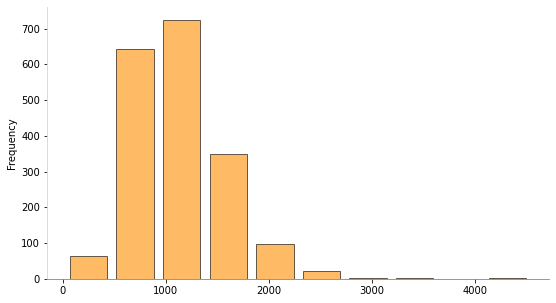

In [6]:
##
## Longitud de los abstracts en caracteres
##  Colores diponibles en matplotlib: https://matplotlib.org/3.1.0/gallery/color/named_colors.html
##
import matplotlib.pyplot as plt

data.Abstract.map(lambda w: len(w), na_action="ignore").plot.hist(
    color="darkorange", alpha=0.6, rwidth=0.8, edgecolor="k", figsize=(9, 5)
)

plt.gca().spines["left"].set_color("lightgray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

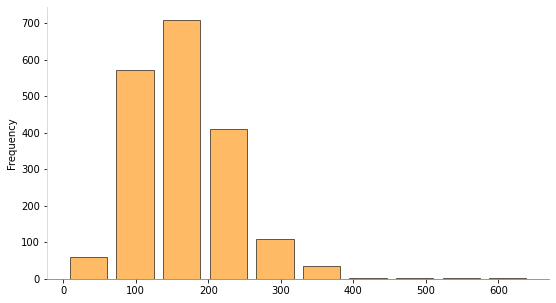

In [7]:
##
## Longitud de los abstracts en palabras
##
data.Abstract.map(lambda w: len(w.split()), na_action="ignore").plot.hist(
    color="darkorange", alpha=0.6, rwidth=0.8, edgecolor="k", figsize=(9, 5)
)

plt.Figure(figsize=(8, 4))
plt.gca().spines["left"].set_color("lightgray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

In [8]:
##
## Busqueda de abstracts con una cadena en particular
##
data.Abstract[data.Abstract.map(lambda w: "mobility" in w.lower(), na_action="ignore")]

0       Mobility is one of the fundamental requirement...
10      The tendency of people to form socially cohesi...
54      In recent years, mobility data from smart card...
95      The influence of urban design on economic vita...
111     This study demonstrates the use of mobile phon...
188     Customer profiles that include gender and age ...
209     To measure job accessibility, person-based app...
235     In this research, we exploit repeated parts in...
236     Tourist flows in historical cities are continu...
239     It is well reported that long commutes have a ...
242     Nowadays, Location-Based Social Networks (LBSN...
244     In the last decades, the notion that cities ar...
251     In Latin America, shopping malls seem to offer...
253     Traditional crime prediction models based on c...
255     Human mobility always had a great influence on...
257     In this paper, we follow the short-ranged Syri...
262     Epidemic outbreaks are an important healthcare...
263     Billio

In [9]:
##
## word tokenizer
##   Separación de las frases en palabras
##
from nltk.tokenize import word_tokenize

tokens = data.Abstract.map(word_tokenize)

# primeros 20 tokens del primer abstract
tokens[0][:20]

['Mobility',
 'is',
 'one',
 'of',
 'the',
 'fundamental',
 'requirements',
 'of',
 'human',
 'life',
 'with',
 'significant',
 'societal',
 'impacts',
 'including',
 'productivity',
 ',',
 'economy',
 ',',
 'social']

In [10]:
##
## Concordancias
##   Muestra las palabras en el contexto de una frase
##
abstracts = data.Abstract.copy()
abstracts = abstracts.dropna()
abstracts = abstracts.map(lambda w: w.strip())
abstracts = abstracts.map(lambda w: w + "." if w[-1] != "." else w)
abstracts = abstracts.tolist()
abstracts = " ".join(abstracts)

abstracts = word_tokenize(abstracts)
abstracts = nltk.Text(abstracts)
abstracts.concordance("human")

Displaying 25 of 230 matches:
                                     human life with significant societal impac
nging climate , and so on . Although human movements follow specific patterns d
y the impacts of an extreme event to human movements , we introduce the concept
-scale online aggregators of offline human biases ? Often portrayed as easy-to-
e seek alternative features based on human behavior that might explain part of 
ctivity of individual investors . In human relations individuals ’ gender and a
ed caller and callee combinations of human interactions , namely male to male ,
endship give rise to a wide scope of human sociality . Here we analyse the rela
ts represent a new view of worldwide human behavior and a new application of ma
owever , this task relies heavily on human observers in the affected locations 
utomating this process , the risk of human error is also eliminated . Compared 
data . AI is taking over the job ’ s human do , receptionists , drivers , chefs
he rights 

In [11]:
##
## Palabras usadas de forma similar en los mismos contextos
##
abstracts.similar("impacts")

impact most effect effects data influence characteristics levels
mobility one and patterns system field results factors dynamics
outcomes accuracy features


In [12]:
##
## Contextos comunes
##
abstracts.common_contexts(["human", "interaction"])

and_networks


In [13]:
##
## Conteo de palabras
##
len(abstracts)

348451

In [14]:
##
## Vocabulario
##
sorted(set(abstracts))[:30]

['!',
 '#',
 '$',
 '%',
 '&',
 "'",
 "''",
 "'3DStock",
 "'Berlin",
 "'Big",
 "'Communities",
 "'Data",
 "'E-consultant",
 "'Engineering",
 "'European",
 "'HorVertical",
 "'JAMSTEC",
 "'Prime-Example",
 "'Research",
 "'Researcher",
 "'Spintronics",
 "'Tamburi",
 "'Virtual",
 "'age",
 "'analytical",
 "'big",
 "'data",
 "'engine",
 "'four",
 "'fuzzy"]

In [15]:
##
## Vocabulario único
##
len(sorted(set(abstracts)))

19978

In [16]:
##
## Ocurrencia de una palabra
##
abstracts.count("human")

213

In [17]:
##
## Indexación de palabras
##
abstracts[98]

'extreme'

In [18]:
abstracts[98:110]

['extreme',
 'event',
 '.',
 'We',
 'present',
 'a',
 'method',
 'to',
 'detect',
 'extreme',
 'events',
 'from']

In [19]:
abstracts.index("extreme")

53

In [20]:
##
## Cómputo de la frecuencia de palabras
##
from nltk import FreqDist

fd = FreqDist(abstracts)
fd

FreqDist({'the': 16783, ',': 13912, '.': 13814, 'of': 12884, 'and': 10793, 'to': 7812, 'a': 6364, 'in': 5374, 'data': 4468, 'is': 4107, ...})

In [21]:
fd.most_common(20)

[('the', 16783),
 (',', 13912),
 ('.', 13814),
 ('of', 12884),
 ('and', 10793),
 ('to', 7812),
 ('a', 6364),
 ('in', 5374),
 ('data', 4468),
 ('is', 4107),
 ('for', 3622),
 ('that', 3008),
 ('The', 2605),
 ('on', 2508),
 ('are', 2320),
 (')', 2245),
 ('(', 2217),
 ('with', 2149),
 ('as', 1828),
 ('this', 1794)]

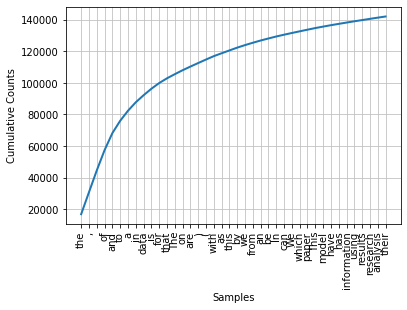

In [22]:
fd.plot(40, cumulative=True)

In [23]:
##
## Collocations
##   Textos que tienden a aparecer juntos
##
abstracts.collocations()

big data; Big Data; machine learning; social media; time series;
results show; data mining; case study; supply chain; data sets;
decision making; paper presents; mobile phone; United States; paper
proposes; land use; association rules; experimental results; social
networks; recent years


In [24]:
##
## Se remueven todas las palabras que no esten
## compuestas por letras
##
import re

words = [re.sub(r"[^A-Za-z]", "", w) for w in abstracts]
words = [w for w in words if w != ""]
words[:6]

['Mobility', 'is', 'one', 'of', 'the', 'fundamental']

In [25]:
##
## Se transforman las palabras minusculas
##
words = [w.lower() for w in words]
words[:6]

['mobility', 'is', 'one', 'of', 'the', 'fundamental']

In [26]:
##
## Conteo de palabras
##   Ver https://docs.python.org/3/library/collections.html
##
from collections import Counter

counter = Counter(words)
counter.most_common(10)

[('the', 19388),
 ('of', 12891),
 ('and', 10808),
 ('to', 8065),
 ('a', 6699),
 ('in', 6627),
 ('data', 4946),
 ('is', 4126),
 ('for', 3758),
 ('that', 3017)]

In [27]:
##
## Remoción de stopwords
##    pip3 install nltk
##    nltk.download('stopwords')
##
STOPWORDS = nltk.corpus.stopwords.words("english")

words = [w for w in words if w not in STOPWORDS]
counter = Counter(words)
counter.most_common(10)

[('data', 4946),
 ('paper', 1041),
 ('model', 951),
 ('using', 920),
 ('information', 907),
 ('research', 831),
 ('results', 827),
 ('analysis', 806),
 ('based', 732),
 ('used', 730)]

## Ejercicio

Para el siguiente texto:

a) Calcule cuántas palabras únicas tiene el texto.

b) Calcule cuántas frases tiene el texto.

c) ¿Cúales son las diez palabras más frecuentes?

d) ¿Cuantas palabras terminan en `ing`?

In [28]:
texto = """
Analytics is the discovery, interpretation, and communication of meaningful patterns
in data. Especially valuable in areas rich with recorded information, analytics relies
on the simultaneous application of statistics, computer programming and operations research
to quantify performance.

Organizations may apply analytics to business data to describe, predict, and improve business
performance. Specifically, areas within analytics include predictive analytics, prescriptive
analytics, enterprise decision management, descriptive analytics, cognitive analytics, Big
Data Analytics, retail analytics, store assortment and stock-keeping unit optimization,
marketing optimization and marketing mix modeling, web analytics, call analytics, speech
analytics, sales force sizing and optimization, price and promotion modeling, predictive
science, credit risk analysis, and fraud analytics. Since analytics can require extensive
computation (see big data), the algorithms and software used for analytics harness the most
current methods in computer science, statistics, and mathematics.

The field of data analysis. Analytics often involves studying past historical data to
research potential trends, to analyze the effects of certain decisions or events, or to
evaluate the performance of a given tool or scenario. The goal of analytics is to improve
the business by gaining knowledge which can be used to make improvements or changes.

Data analytics (DA) is the process of examining data sets in order to draw conclusions
about the information they contain, increasingly with the aid of specialized systems
and software. Data analytics technologies and techniques are widely used in commercial
industries to enable organizations to make more-informed business decisions and by
scientists and researchers to verify or disprove scientific models, theories and
hypotheses.
"""